In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Evaluation: Number of feasible solutions

### Fill in the necessary parameters

In [2]:
#Path to the Github repo in your computer (https://github.com/muuurk/partitioned_scheduling_on_RT-FaaS)
REPO_PATH = "/home/szalay/projects/partitioned_scheduling_on_RT-FaaS"

# Algorithm to examine. 
# Possible values: ALG1 (ALG in the paper), FFD (FFD in the paper), BR (BR in the paper) and DBR (EBR in the paper)
ALGORITHM = "DBR"

### Load measured data

In [3]:
algorithms = [ALGORITHM]
df_for_fig = pd.DataFrame(columns=['one_count', 'total_fails', 'algorithm'])

matrix_sizes=[(10,100), (50,100), (100,100), (500,100)]
for matrix_size in matrix_sizes:

    if matrix_size[0] == 10:
        sim_groups = range(10,110,5)
    elif matrix_size[0] == 50:
        sim_groups = range(50,550,25)
    elif matrix_size[0] == 100:
        sim_groups = range(100,1100,50)
    elif matrix_size[0] == 500:
        sim_groups = range(500,5500,250)
    for sim_group in sim_groups:
        try:
            df = pd.read_csv('{}/dataset_paper/baruah_tests_matrix_{}x{}_{}.csv'.format(REPO_PATH, matrix_size[0],matrix_size[1],sim_group))
            one_counts = list(set(df['one count']))
            one_counts.sort()

            for alg in algorithms:
                for oc in one_counts[:10]:
                    df_filtered = df.loc[df['one count'] == oc]
                    df_filtered = df_filtered.loc[df_filtered[alg] == np.inf]
                    # sim cases when the algorithm did not have solution
                    sim_count_wo_sol = list(set(df_filtered['Sim. case']))
                    print('baruah_tests_matrix_{}x{}_{}.csv'.format(matrix_size[0],matrix_size[1],sim_group))
                    df_for_fig = df_for_fig.append({"Saturation [%]":(oc/(matrix_size[0]*matrix_size[1]))*100,
                                                    "total_fails": len(sim_count_wo_sol),
                                                    "#tasks":str(matrix_size[0])}, ignore_index=True)
        except:
            pass

baruah_tests_matrix_10x100_10.csv
baruah_tests_matrix_10x100_15.csv
baruah_tests_matrix_10x100_20.csv
baruah_tests_matrix_10x100_25.csv
baruah_tests_matrix_10x100_30.csv
baruah_tests_matrix_10x100_35.csv
baruah_tests_matrix_10x100_40.csv
baruah_tests_matrix_10x100_45.csv
baruah_tests_matrix_10x100_50.csv
baruah_tests_matrix_10x100_55.csv
baruah_tests_matrix_10x100_60.csv
baruah_tests_matrix_10x100_65.csv
baruah_tests_matrix_10x100_70.csv
baruah_tests_matrix_10x100_75.csv
baruah_tests_matrix_10x100_80.csv
baruah_tests_matrix_10x100_85.csv
baruah_tests_matrix_10x100_90.csv
baruah_tests_matrix_10x100_95.csv
baruah_tests_matrix_10x100_100.csv
baruah_tests_matrix_10x100_105.csv
baruah_tests_matrix_50x100_50.csv
baruah_tests_matrix_50x100_75.csv
baruah_tests_matrix_50x100_100.csv
baruah_tests_matrix_50x100_125.csv
baruah_tests_matrix_50x100_150.csv
baruah_tests_matrix_50x100_175.csv
baruah_tests_matrix_50x100_200.csv
baruah_tests_matrix_50x100_225.csv
baruah_tests_matrix_50x100_250.csv
barua

### Plot the figure

It shows how many times the examined algorithm have not returned any feasible partitioning solution. The x-axes show the density of the boolean matrix from which the utilization matrix was generated for the simulation. We have executed one hundred simulations for a given density, each of them with different utilization matrices. The y-axes depict the percentage of simulations when the algorithms have no feasible results

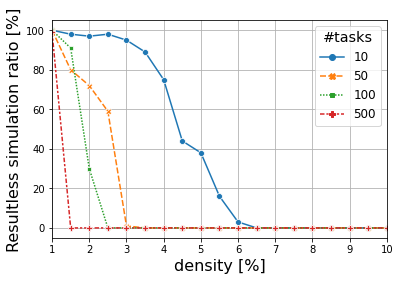

In [4]:
df_for_fig["Saturation [%]"] = df_for_fig["Saturation [%]"].astype(float)
df_for_fig["total_fails"] = df_for_fig["total_fails"].astype(int)

ax = sns.lineplot(
    data=df_for_fig,
    x="Saturation [%]", y="total_fails", hue="#tasks", style="#tasks",
    markers=True)

ax.grid()
ax.set_xlim([1,10])
ax.set_ylabel("Resultless simulation ratio [%]", fontsize=16)
ax.set_xlabel("density [%]", fontsize=16)
leg = ax.legend(prop={'size': 16})
leg = ax.legend(fontsize = 'large')
leg.set_title("#tasks", prop = {'size':'x-large'})

# Evaluation: Number of provisioned processors for tasks

### Fill in the necessary parameters

In [5]:
#Path to the Github repo in your computer (https://github.com/muuurk/partitioned_scheduling_on_RT-FaaS)
REPO_PATH = "/home/szalay/projects/partitioned_scheduling_on_RT-FaaS"

ALGORITHMS = ["ALG1",  "DBR", "FFD", "BR"]

### Plot the figure
This plot presents how the examined algorithms perform in task partitioning to minimize the number of used CPUs for the RT tasks. For a given boolean matrix density, we have executed one hundred simulations with different utilization matrices. Consequently, one point in the figure represents the average number of the used CPUs of the resulted partitioning depending on the given density value. 

(10, 100)
(50, 100)
(100, 100)
(500, 100)


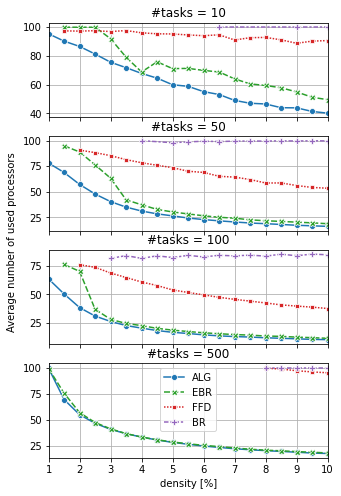

In [6]:
def avg(lst): 
    return sum(lst) / len(lst) 

# 4 dataframes to the 4 figures
df_for_fig = pd.DataFrame(columns=['one_count', 'algorithm'])
df_for_fig2 = pd.DataFrame(columns=['one_count', 'algorithm'])
df_for_fig3 = pd.DataFrame(columns=['one_count', 'algorithm'])
df_for_fig4 = pd.DataFrame(columns=['one_count', 'algorithm'])

matrix_sizes=[(10,100), (50,100), (100,100), (500,100)]

for matrix_size in matrix_sizes:
    print(matrix_size)
    if matrix_size[0] == 10:
        sim_groups = range(10,110,5)
    elif matrix_size[0] == 50:
        sim_groups = range(50,550,25)
    elif matrix_size[0] == 100:
        sim_groups = range(100,1100,50)
    elif matrix_size[0] == 500:
        sim_groups = range(500,5500,250)
    for sim_group in sim_groups:
        
        try:
            df = pd.read_csv('{}/dataset_paper/baruah_tests_matrix_{}x{}_{}.csv'.format(REPO_PATH, matrix_size[0],matrix_size[1],sim_group))
            one_counts = list(set(df['one count']))
            one_counts.sort()

            for alg in ALGORITHMS:
                for oc in one_counts:
                    df_filtered = df.loc[df['one count'] == oc]
                     # sim cases when the algorithm does have solution
                    df_filtered = df_filtered.loc[df_filtered[alg] != np.inf]

                    results = list(df_filtered[alg])
                    
                    matrix_size_index = matrix_sizes.index(matrix_size)
                    sum_value = 0
                    for r in results:
                            sum_value += (r/min(matrix_size[0], 100))*100
                            
                    avg_value = sum_value/len(results)
                    if matrix_size[0] == 10:
                            df_for_fig = df_for_fig.append({"density [%]":(oc/(matrix_size[0]*matrix_size[1]))*100,
                                                        "solution": avg_value,
                                                        "algorithm": "{}".format(alg)}, ignore_index=True)
                    elif matrix_size[0] == 50:
                        df_for_fig2 = df_for_fig2.append({"density [%]":(oc/(matrix_size[0]*matrix_size[1]))*100,
                                                    "solution": avg_value,
                                                    "algorithm": "{}".format(alg)}, ignore_index=True)
                    elif matrix_size[0] == 100:
                        df_for_fig3 = df_for_fig3.append({"density [%]":(oc/(matrix_size[0]*matrix_size[1]))*100,
                                                    "solution": avg_value,
                                                    "algorithm": "{}".format(alg)}, ignore_index=True)
                    elif matrix_size[0] == 500:
                        df_for_fig4 = df_for_fig4.append({"density [%]":(oc/(matrix_size[0]*matrix_size[1]))*100,
                                                        "solution": avg_value,
                                                        "algorithm": "{}".format(alg)}, ignore_index=True)            
        except:
            pass


# Plot the Figure   
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(5,8))

fig.text(0.01, 0.5, 'Average number of used processors', va='center', rotation='vertical')
    
sns.lineplot(data = df_for_fig, ax=axes[0], x="density [%]", y="solution", hue="algorithm", style="algorithm",
    markers=True, dashes=True, hue_order=["ALG1", "ALG2", "DBR", "FFD", "BR"])
axes[0].set_title("#tasks = 10")
axes[0].grid()
axes[0].get_legend().set_visible(False)
axes[0].set_ylabel(" ")
    

sns.lineplot(data = df_for_fig2, ax=axes[1], x="density [%]", y="solution", hue="algorithm",
             style="algorithm", markers=True, dashes=True, hue_order=["ALG1", "ALG2", "DBR", "FFD", "BR"])
axes[1].grid()
axes[1].set_title("#tasks = 50")
axes[1].set_ylabel(" ")
axes[1].get_legend().set_visible(False)
axes[1].set_xlim([1,10])

sns.lineplot(data = df_for_fig3, ax=axes[2], x="density [%]", y="solution", hue="algorithm",
             style="algorithm", markers=True, dashes=True, hue_order=["ALG1", "ALG2", "DBR", "FFD", "BR"])
axes[2].grid()
axes[2].set_title("#tasks = 100")
axes[2].set_ylabel(" ")
axes[2].get_legend().set_visible(False)
axes[2].set_xlim([1,10])

sns.lineplot(data = df_for_fig4, ax=axes[3], x="density [%]", y="solution", hue="algorithm",
             style="algorithm", markers=True, dashes=True, hue_order=["ALG1", "ALG2", "DBR", "FFD", "BR"])
axes[3].grid()
axes[3].set_title("#tasks = 500")
axes[3].set_ylabel(" ")
axes[3].get_legend().set_visible(True)
axes[3].legend(('ALG', 'EBR', 'FFD', 'BR'), loc='upper center')
axes[3].set_xlim([1,10])

plt.savefig('partitioning.pdf')  

